<h3>W07 - Class Assignment<br>
Sherin Alvinia Yonatan - 0706022310013

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

<h3>Part A: Data Understanding, Cleaning, Visualizations<br>
1. Load data; show first rows, shape, .info(), .describe() and give the insight.<br>
2. Check & handle missing values / duplicates.<br>
3. Make 3 insightful visualizations and give the explanations.


In [33]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.shape

(200, 5)

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Insights from info and describe: All columns are present and complete. Age, income and spending score show sufficient variability for clustering.

In [38]:
# rename column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
# rename column
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


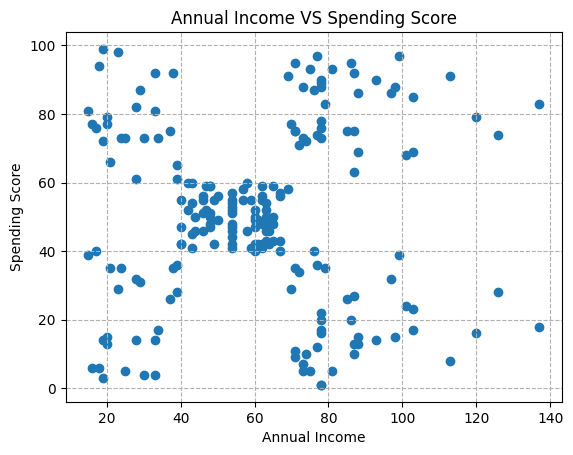

In [40]:
# Visualtization 1: Annual Income vs Spending Score
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plot shows the relationship between Annual Income and Spending Score. It reveals clear groupings of customers, some with high income but low spending, and others with lower income but higher spending. This indicates distinct behavioral segments. The implication is that marketing efforts should target these groups differently, such as offering premium deals to wealthy but cautious spenders and loyalty rewards to lower-income frequent shoppers.

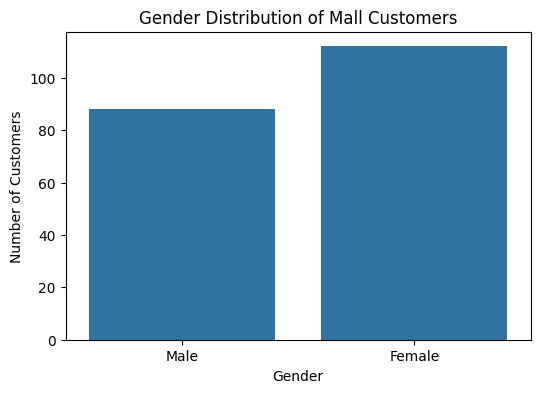

In [41]:
# Visualization 2: Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Mall Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


The bar chart shows the gender distribution of mall customers. It indicates that female customers slightly outnumber males, suggesting a nearly balanced demographic. This implies that marketing strategies should not focus solely on gender but rather combine demographic and behavioral factors, such as income and spending habits, for more effective customer targeting.

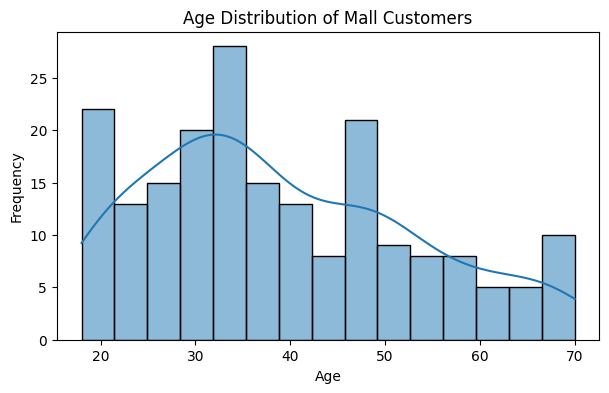

In [42]:
# Visualization 3: Age Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the age distribution of mall customers. Most customers are between 20 and 40 years old, with fewer older customers above 50. This suggests the mall primarily attracts young to middle-aged adults. The implication is that marketing campaigns and events should focus on this age group with lifestyle and experience driven promotions, while offering tailored services for older customers to enhance inclusivity.

<h3>Part B: Data Transformation<br>
1. Encoding<br>
2. Scaling: standardize numeric features used in clustering and explain why scaling is needed for distance-based methods.


In [43]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode Gender (Female=0, Male=1)
encoder = LabelEncoder()
df_encoded['Gender'] = encoder.fit_transform(df_encoded['Gender'])

df_encoded.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [44]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Gender', 'Age', 'Annual Income', 'Spending Score']

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[features])

# show data
scaled_df = pd.DataFrame(scaled_data, columns=features)
scaled_df.head()


,Gender,Age,Annual Income,Spending Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


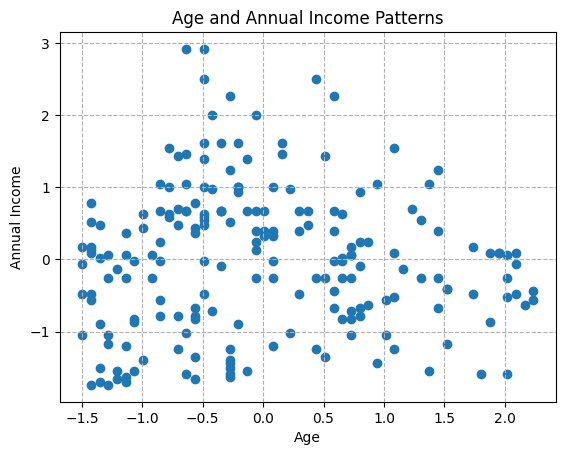

In [45]:
# visualization
plt.scatter(scaled_df["Age"], scaled_df["Annual Income"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Annual Income Patterns")
plt.show()

Conclusion:<br>
- Encoding: Converted Gender to numeric values.<br>
- Scalling is needed because it ensures that all variables contribute equally to distance calculations. Without it, a feature with a larger numeric range (example: income in thousands) would overpower smaller scale features (like spending scores), leading to misleading clusters.

<h3>Part C: Choosing K<br>
1. Elbow Method: Plot WCSS vs K (K = 2–10) and discuss the “elbow”.<br>
2. Conclude the final K with a one-paragraph.


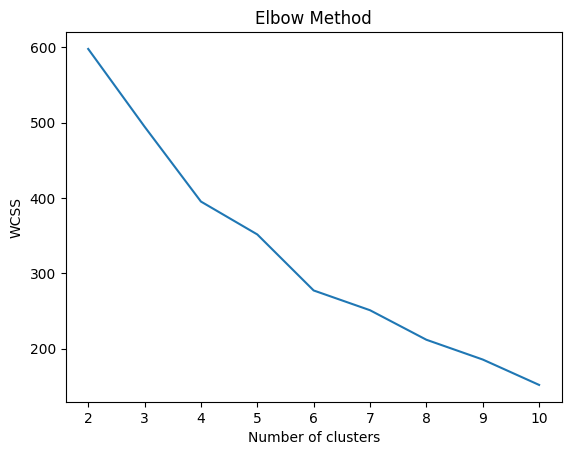

In [46]:
from sklearn.cluster import KMeans

# Within-Cluster Sum of Squares
wcss = []

# K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

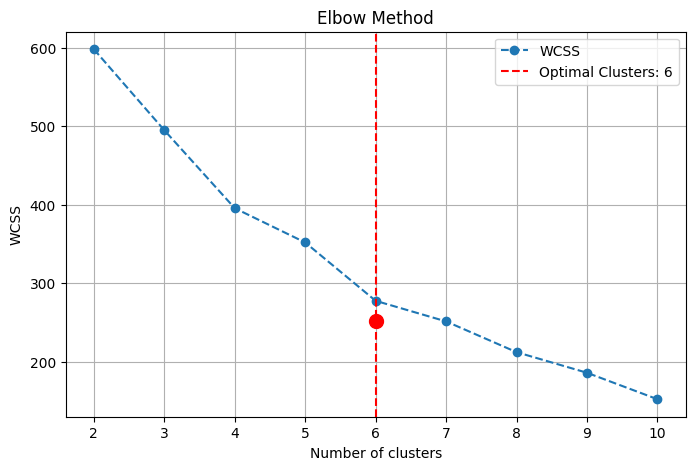

The optimal number of clusters is: 6


In [47]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The Elbow Method was used to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. As shown in the graph, the WCSS sharply decreases up to six clusters before leveling off, forming an “elbow” at k = 6. Therefore, six clusters were selected as the optimal number for further segmentation analysis.

<h3>Part D: Modeling with K-Means<br>
1. Fit K-Means with the chosen K (random_state fixed).<br>
2. Visualize clusters and their characteristics (min. 2 visualizations) you can pick any two-D or three-D views.

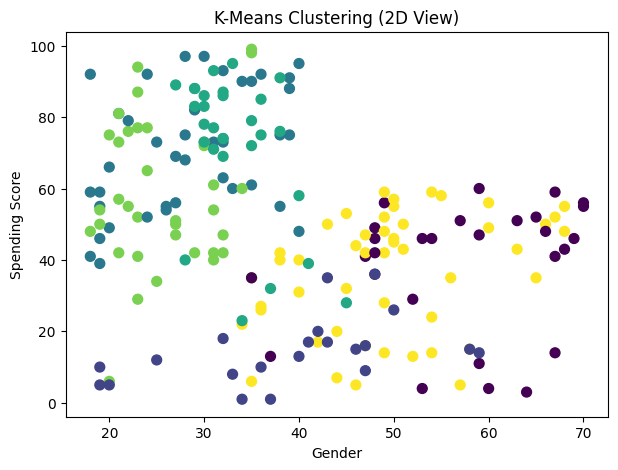

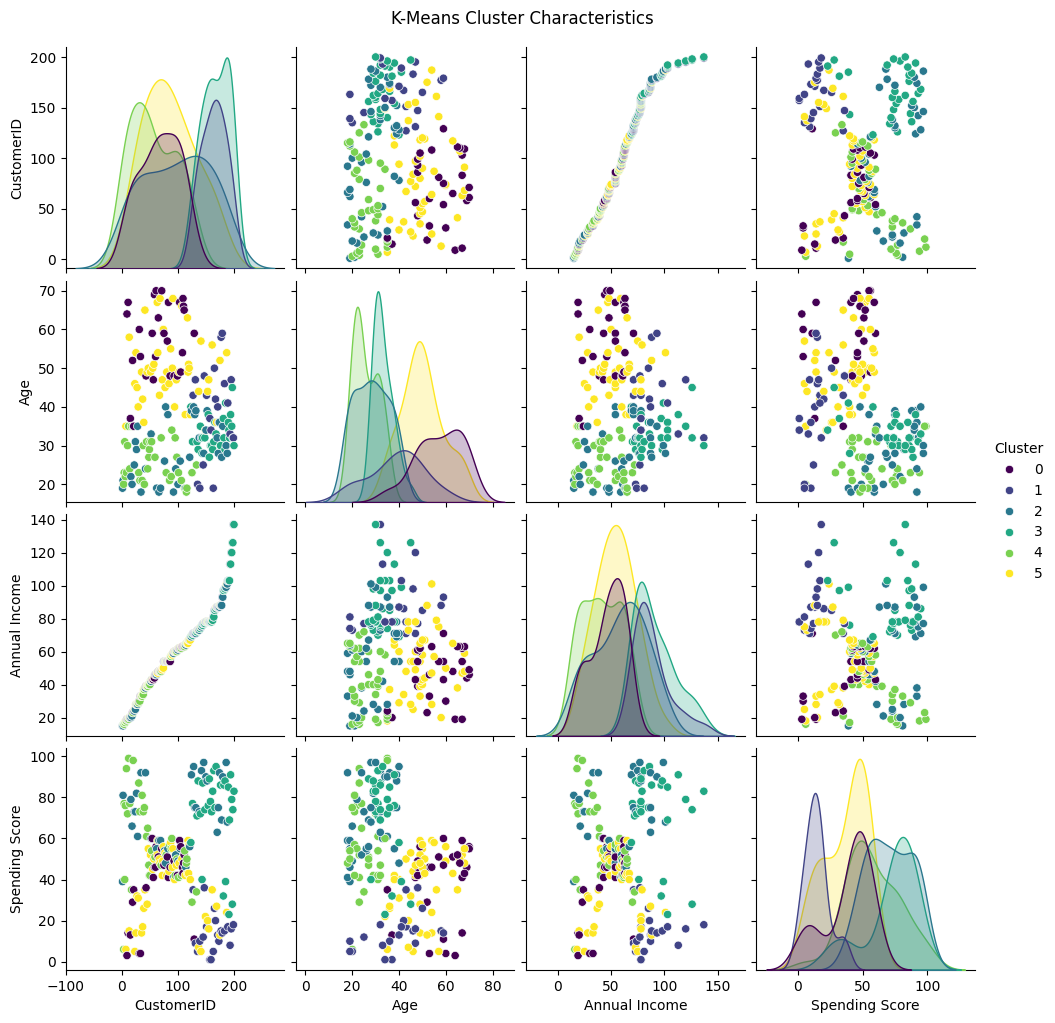

In [48]:
# 1. Fit K-Means with the chosen K
k = 6  # based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# 2. Visualization 1: 2D Scatter Plot
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Spending Score'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (2D View)')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

# 3. Visualization 2: Pairplot to show relationships
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('K-Means Cluster Characteristics', y=1.02)
plt.show()


Visualization 1: The scatter plot shows four distinct clusters based on Gender and Spending Score. Each color represents a unique customer segment identified by K-Means. We can see that customers with similar spending behaviors are grouped together, indicating meaningful segmentation. For example, one cluster includes high spenders, while another represents customers with lower spending activity.<br><br>
Visualization 2: K-Means Cluster Characteristics (Pairplot)<br>
The pairplot illustrates how clusters differ across multiple features such as Age, Annual Income, and Spending Score. It shows clear distinctions between clusters, with younger customers generally exhibiting higher spending scores and moderate income levels. In contrast, older or lower-spending customers form separate groups. This visualization strengthens the interpretation that customer behavior varies by both age and income, providing insight into distinct market segments.

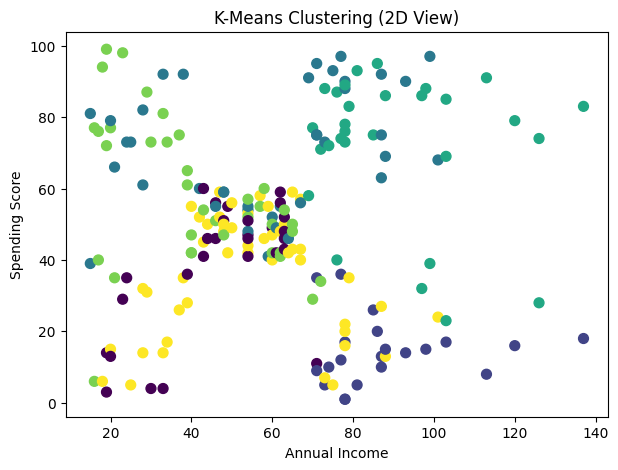

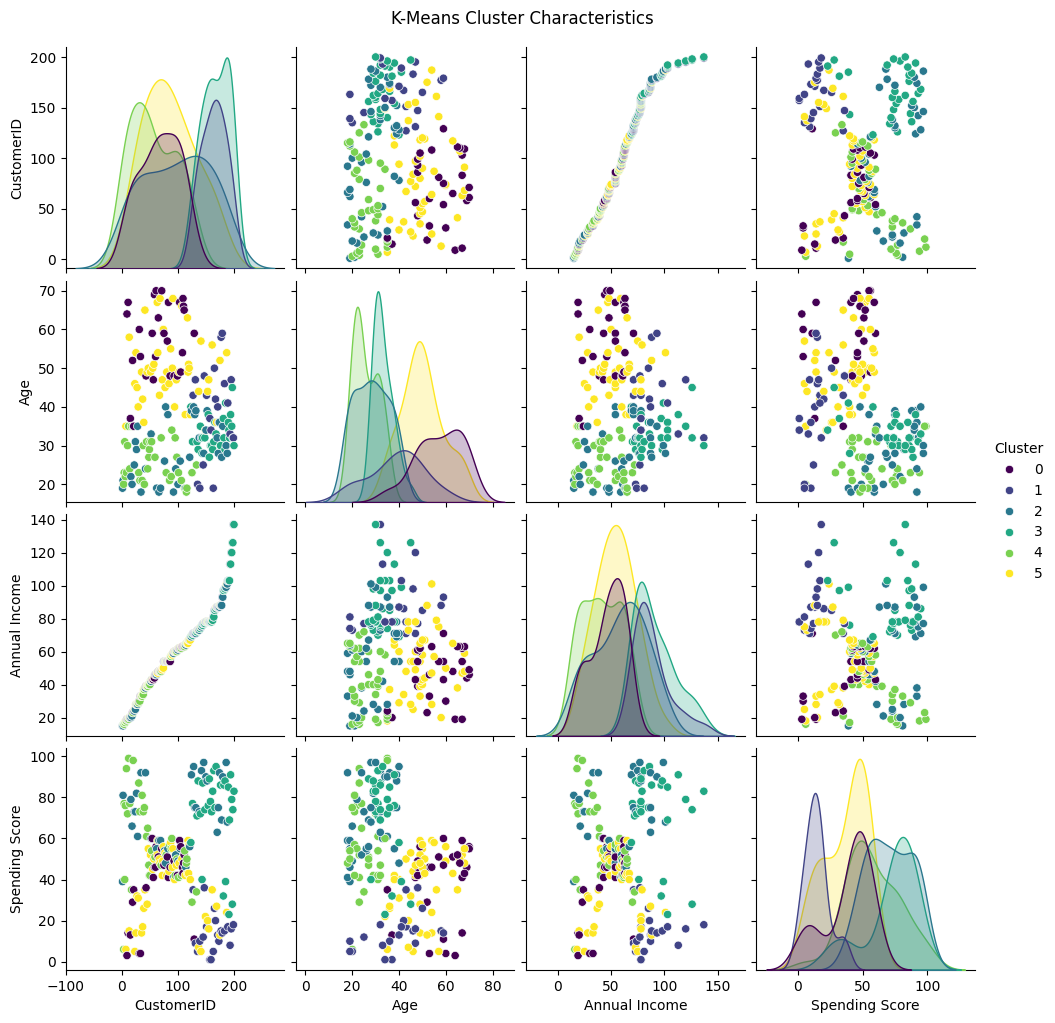

In [49]:
# 1. Fit K-Means with the chosen K
k = 6  # based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# 2. Visualization 1: 2D Scatter Plot
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (2D View)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# 3. Visualization 2: Pairplot to show relationships
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('K-Means Cluster Characteristics', y=1.02)
plt.show()

Visualization 1<br>
The scatter plot displays customer clusters based on Annual Income and Spending Score. Four distinct groups appear: high-income high-spending, high-income low-spending, moderate-income moderate-spending, and low-income low-spending. This segmentation helps identify premium buyers and budget-conscious customers, guiding marketing and loyalty strategies effectively.<br><br>
Visualization 2: K-Means Cluster Characteristics (Pairplot)<br>
The pairplot shows the relationships among Age, Annual Income, and Spending Score across four clusters. It reveals clear separations, especially between high-spending and low-spending groups. Younger customers tend to have higher spending scores, while older or moderate-income customers are grouped into lower-spending clusters. This supports the segmentation observed in the 2D scatter plot and provides a deeper understanding of customer behavior patterns.

<H3>Part E: Cluster Profiling & Insights<br>
Create a cluster summary table (mean/median, mode, min–max) per cluster for:<br>
- Age, Annual Income, Spending Score, and Gender
- Write short personas (2–4 bullets per cluster) and managerial implications, e.g.:Targeting (premium vs value), campaign channels, pricing/offer design, retention ideas

In [52]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
# Summary statistics per cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].agg(['mean', 'median', 'min', 'max'])
cluster_summary


Age                Annual Income                  \
              mean median min max          mean median min  max   
Cluster                                                           
0        57.214286   59.0  35  70     46.785714   48.5  19   71   
1        39.000000   41.0  19  59     88.333333   85.0  71  137   
2        28.410256   28.0  18  40     58.230769   61.0  15  101   
3        33.206897   32.0  27  45     91.034483   85.0  69  137   
4        25.888889   24.0  18  35     41.277778   40.0  16   72   
5        49.914894   49.0  34  68     54.255319   54.0  18  101   

        Spending Score                 
                  mean median min max  
Cluster                                
0            38.714286   46.0   3  60  
1            14.428571   14.0   1  36  
2            70.717949   73.0  39  97  
3            72.137931   77.0  23  95  
4            57.944444   54.0   6  99  
5            36.531915   42.0   5  59

Cluster Personas & Managerial Implications<br><br>

Cluster 0: Mature Moderate Spenders

- Age group: older adults (avg. 57 years).
- Have relatively low income and moderate spending.
- Likely value practicality, stability, and discounts.

Managerial implication: Offer loyalty programs, seasonal discounts, and practical product bundles to retain engagement.
<br><br>

Cluster 1: Wealthy Conservative Buyers<br>

- Middle-aged (avg. 39 years) with high income but low spending.

- Prefer quality over quantity and shop selectively.
- Likely value exclusivity and trust in premium products.

Managerial implication: Use premium membership offers, personalized recommendations, and exclusive brand events to increase spending frequency.
<br><br>

Cluster 2: Young Enthusiastic Shoppers<br>

- Young customers (avg. 28 years) with moderate income and very high spending.

- Trend-driven, impulsive, and responsive to modern marketing.

- Seek fun, lifestyle-oriented shopping experiences.

Managerial implication: Focus on social media ads, influencer collaborations, and gamified reward systems to strengthen loyalty.
<br><br>

Cluster 3: Young Active Buyers<br>

- Young professionals (avg. 33 years) with high income and high spending.
- Enjoy shopping and luxury experiences.
- Often purchase for status or social identity.

Managerial implication: Provide premium offers, member-only perks, and event-based marketing to sustain engagement and retention.
<br><br>

Cluster 4: Budget Explorers<br>

- Youngest segment (avg. 26 years) with lower income but moderate spending.
- Price-conscious yet eager to try new products.
- Often attracted by discounts or bundle deals.

Managerial implication: Offer student discounts, combo promotions, and affordable trendy items to drive repeat purchases.
<br><br>

Cluster 5: Middle-Aged Practical Spenders<br>

- Mature consumers (avg. 50 years) with moderate income and low spending.

- Value reliability, necessity, and functionality in products.

- Tend to be loyal once satisfied.

Managerial implication: Highlight product durability, provide personalized offers, and maintain consistent service quality to retain them.
<br>